# **Red Wine Quality Prediction**

**Problem Statement:**<br>
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

**Attribute Information**

Input variables (based on physicochemical tests):<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - densityv
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10)<br>

We are expected to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

# Importing Libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('winequality-red.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are **1599 rows** and **12 Columns**. Data set has **No Null Values**. "quality" would be the target variable. Apart from "quality" all the other features are in float datatype.

In [5]:
#Statistical Summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


1) All the columns have the mean close to median. There may not be outliers and all the columns may follow normal distruibution.<br>
2) Minimum value of quality is 3 and the maximum is 8. <br>
3) All the values are positive and there may not be any errors in the dataset.<br>
4) Features 'free sulfur dioxide' and 'total sulfur dioxide' seems to have a difference in the maximum and 75th percentile. These columns may have outliers.<br>

## Understanding the data

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df[df['quality']>=7].shape

(217, 12)

So there are 217 Rows which are to be classified as 'good/1' and 1882 rows as  'not good/0'.

Let's create a new column 'class' that will be our target column. 

In [8]:
def clssification(int):
    if int >= 7:
        return  1
    else:
        return 0

In [9]:
df['class'] = df['quality'].apply(clssification)

**1 - Good Wine** and **0 - Not good wine**

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [11]:
df['class'].value_counts()

0    1382
1     217
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

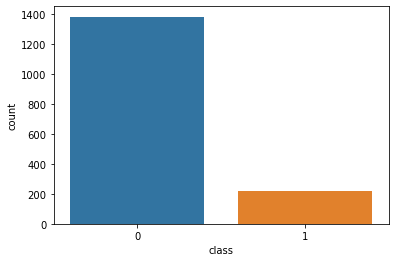

In [12]:
sns.countplot(df['class'])

This is clearly an Imbalance data set problem.<br>
Let's understand the features.

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

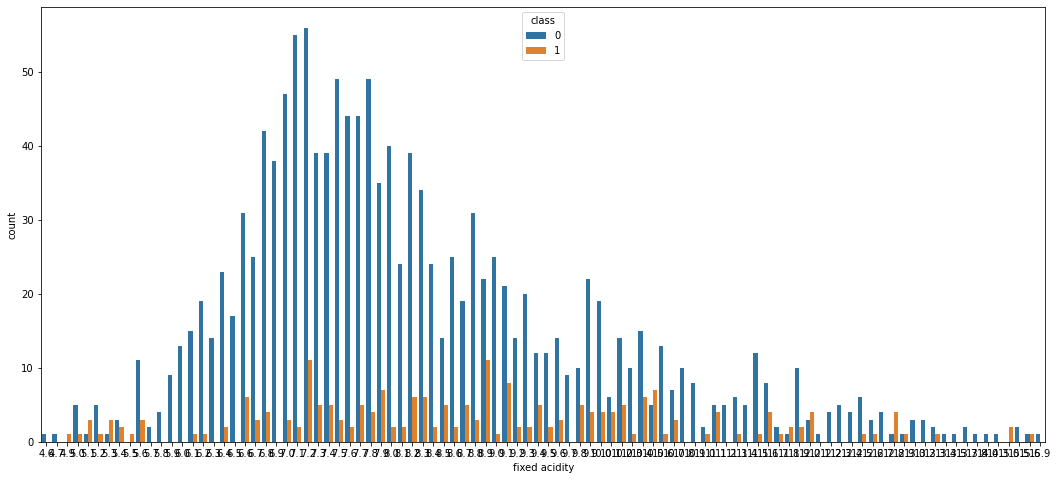

In [14]:
plt.figure(figsize=(18,8))
sns.countplot(df['fixed acidity'], hue=df['class'])

"fixed acidity" plot shows that good wine has a less fixed acidity values and not_good wines have a higher amount of fixed acidity. However, few not_good wines do have similar values as good wines.<br>

<AxesSubplot:xlabel='volatile acidity', ylabel='count'>

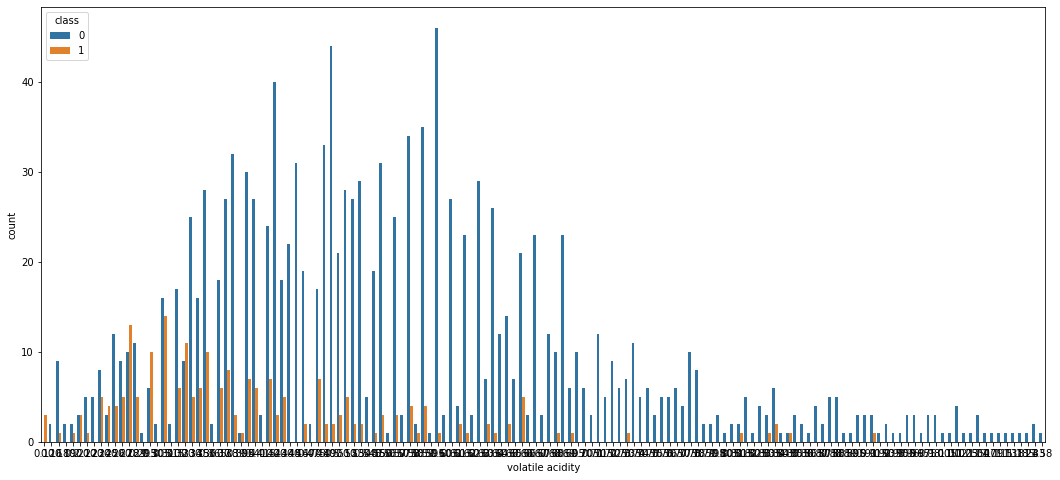

In [15]:
plt.figure(figsize=(18,8))
sns.countplot(df['volatile acidity'], hue=df['class'])

"volatile acidity" plot shows that the good wines vakues do not exceed 12 and have range from 1,2-12. Not_good wines show relatively high values of volatile acidity.

<AxesSubplot:xlabel='citric acid', ylabel='count'>

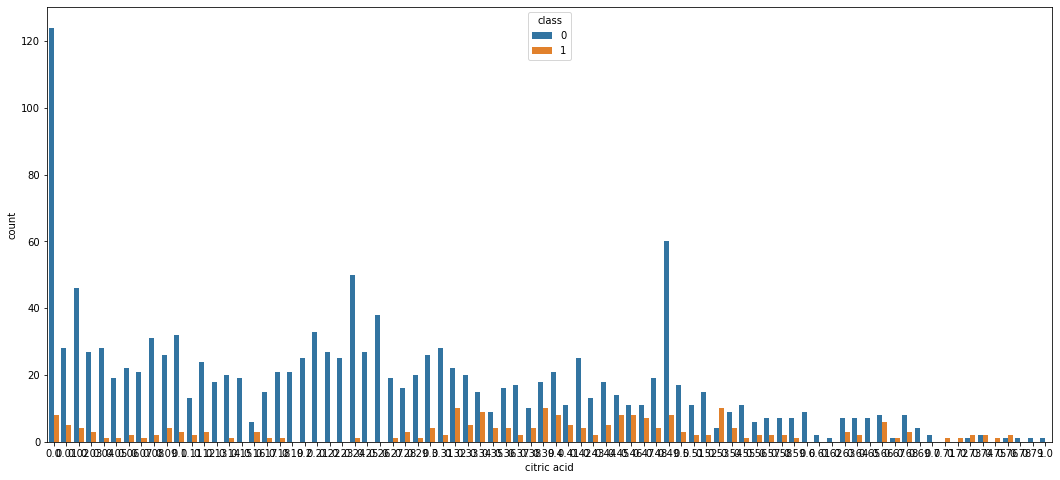

In [16]:
plt.figure(figsize=(18,8))
sns.countplot(df['citric acid'], hue=df['class'])

'citric acid' has less amount of value for good Wines and comparatively hig amount of values for not_good wines. However, some of the not_good wines have same or similar values as good wines.<br>

<AxesSubplot:xlabel='residual sugar', ylabel='count'>

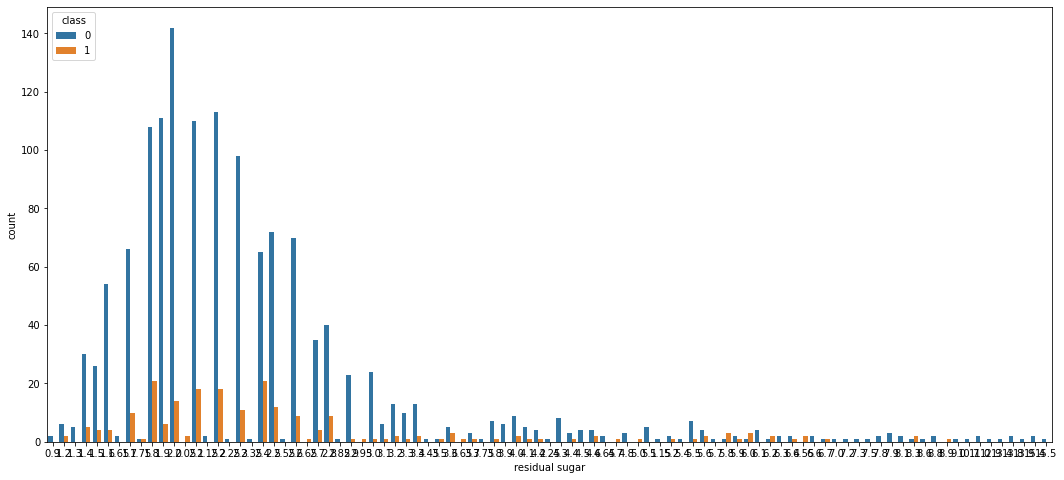

In [17]:
plt.figure(figsize=(18,8))
sns.countplot(df['residual sugar'], hue=df['class'])

'residual sugar' has comparative values for some wines. That is, not_good wines have a higher value when compared to good wines. However, some of the not_good wines have same or similar values as good wines.

<AxesSubplot:xlabel='chlorides', ylabel='count'>

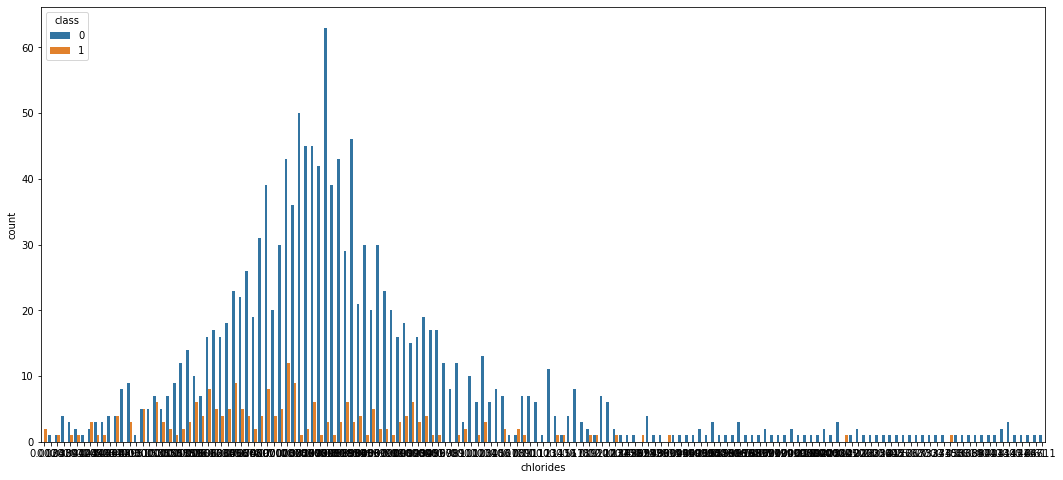

In [18]:
plt.figure(figsize=(18,8))
sns.countplot(df['chlorides'], hue=df['class'])

'chlorides' values are low for good wines and do not exceed 12 and some good wines do have very low chloride values as well.<br>
However, some of the not_good wines have same or similar values as good wines.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='count'>

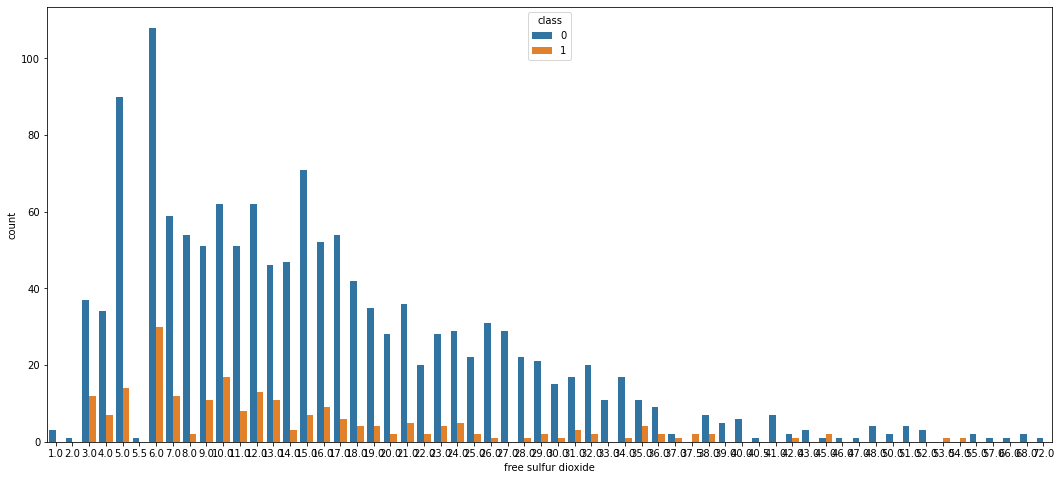

In [19]:
plt.figure(figsize=(18,8))
sns.countplot(df['free sulfur dioxide'], hue=df['class'])

'free sulfur dioxide' values for not_good values are high and there are very few not_good wines with low free sulfur dioxide values.<br>
not_good wines have low values and only 1 good wine has a value of 30

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='count'>

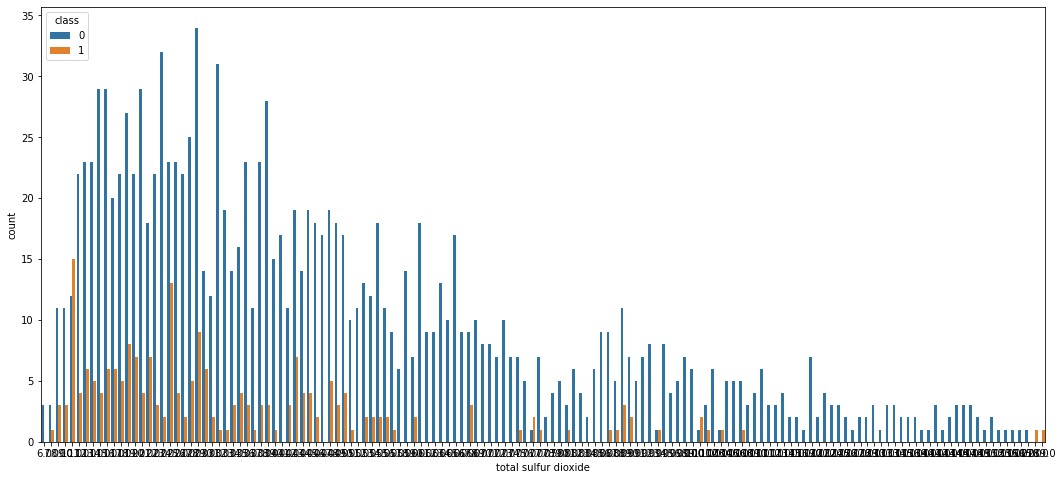

In [20]:
plt.figure(figsize=(18,8))
sns.countplot(df['total sulfur dioxide'], hue=df['class'])

'total sulfur dioxide' for  not good wines are high, whereas, good wines have only 2 wines that have a value greter than 10.

<AxesSubplot:xlabel='density', ylabel='count'>

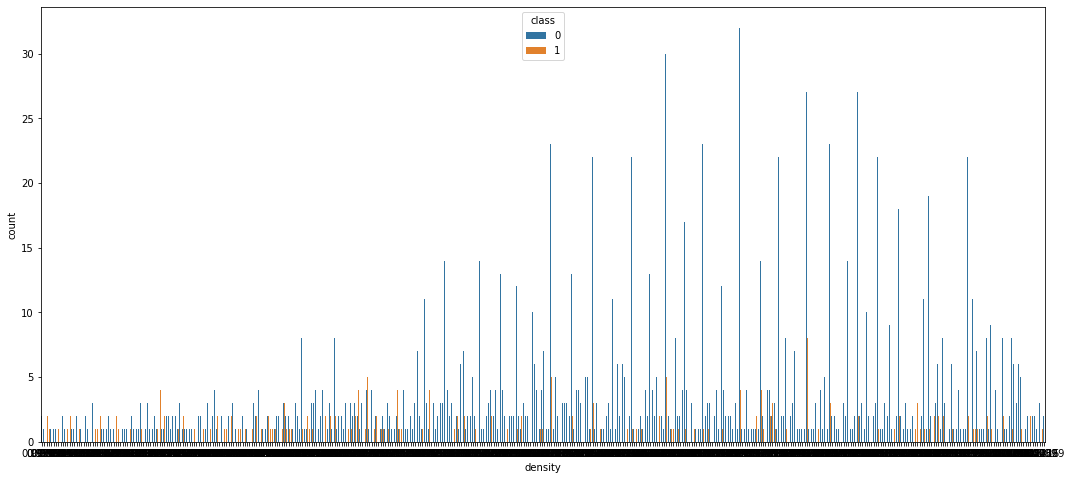

In [21]:
plt.figure(figsize=(18,8))
sns.countplot(df['density'], hue=df['class'])

'density' has huge difference in terms of both good and not_good wines. not_good wines have a high density than compared to good wines.

<AxesSubplot:xlabel='pH', ylabel='count'>

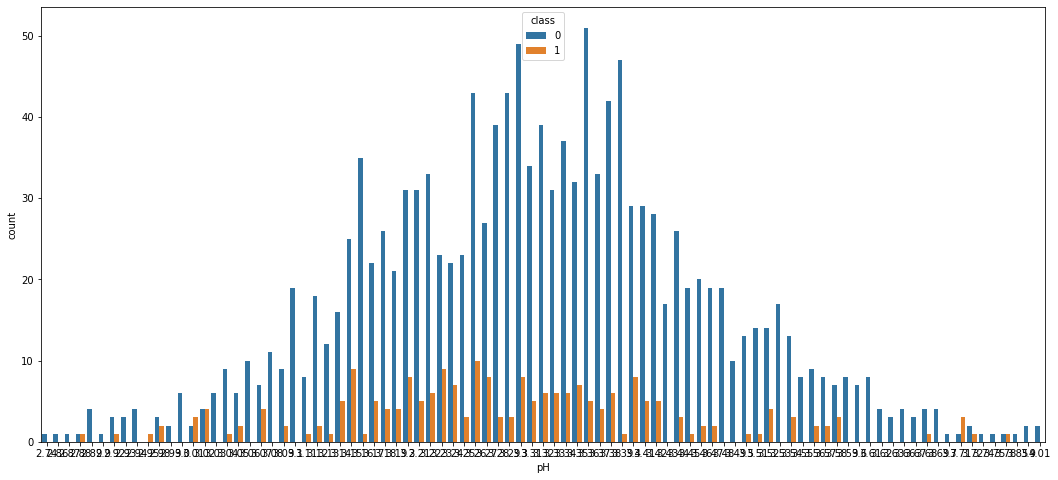

In [22]:
plt.figure(figsize=(18,8))
sns.countplot(df['pH'], hue=df['class'])

pH value is high for not_good wines. pH value does not exceed 10 for good wines

<AxesSubplot:xlabel='sulphates', ylabel='count'>

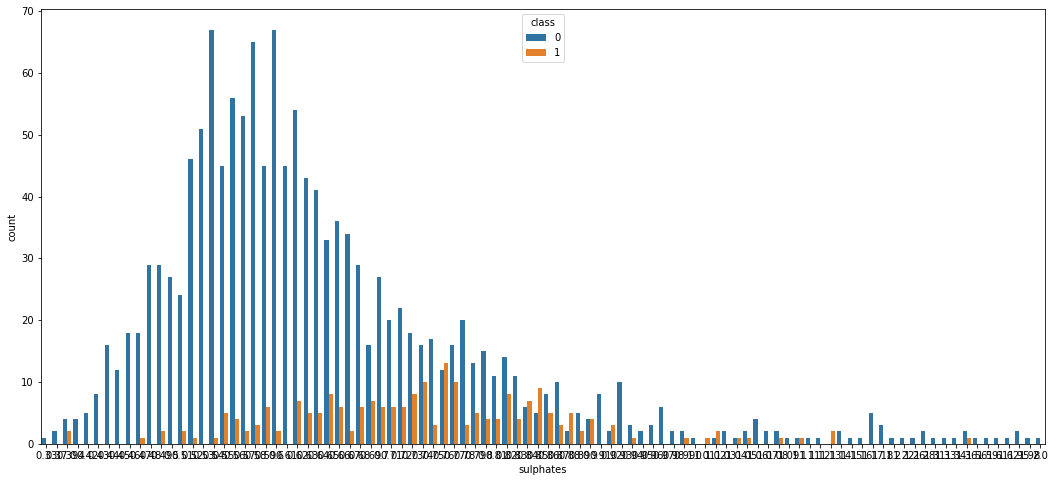

In [23]:
plt.figure(figsize=(18,8))
sns.countplot(df['sulphates'], hue=df['class'])

'sulphates' for not-good wines values are high and for good wines the value does not exceed 11.

<AxesSubplot:xlabel='alcohol', ylabel='count'>

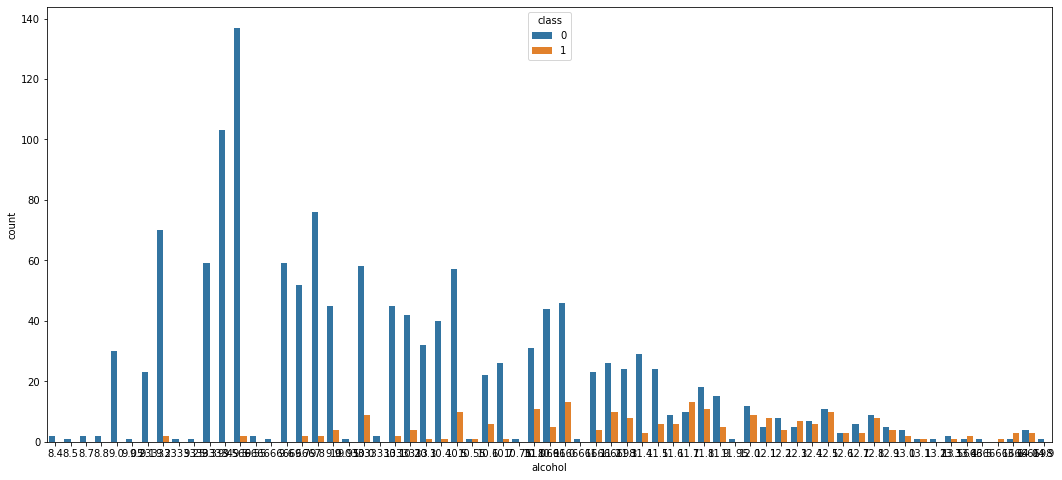

In [24]:
plt.figure(figsize=(18,8))
sns.countplot(df['alcohol'], hue=df['class'])

'alcohol' value for not_good wines have a greater values. good wines have a small value for alcohol.

<AxesSubplot:>

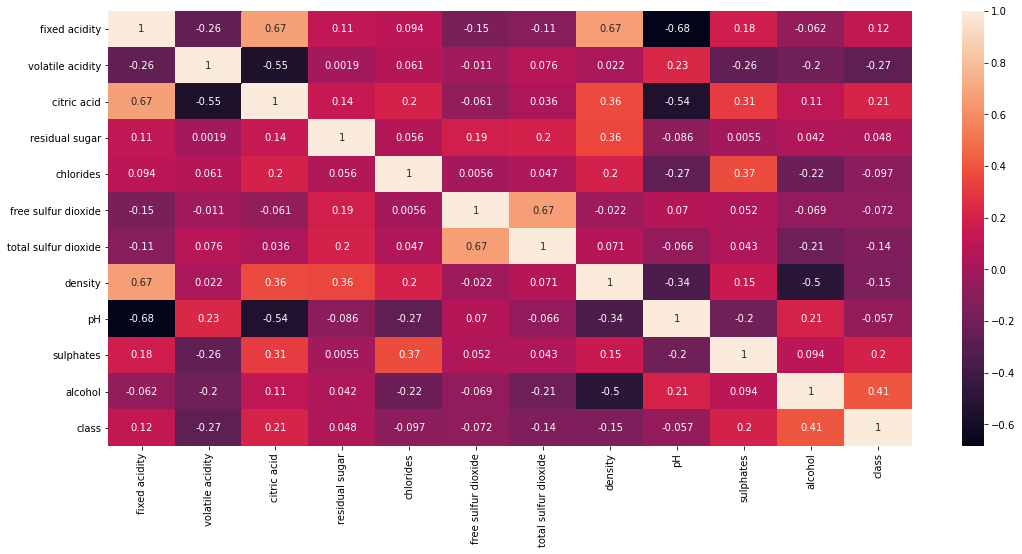

In [25]:
cor = df.drop('quality', axis=1).corr()
plt.figure(figsize=(18,8))
sns.heatmap(cor, annot=True)

From Heat map, we can make out that columns ['pH', 'free sulphur dioxide', 'chlorides', 'residual sugar'] has low correlation.

In [26]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'class'],
      dtype='object')

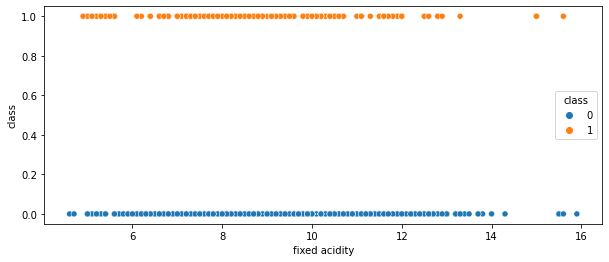

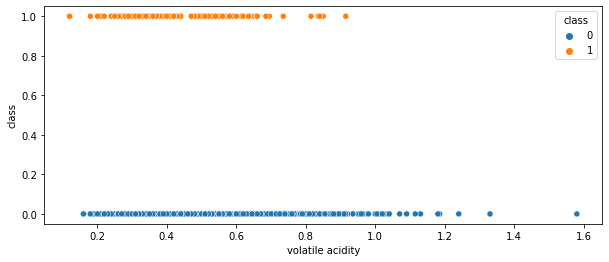

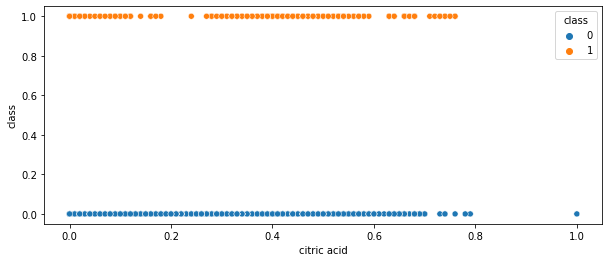

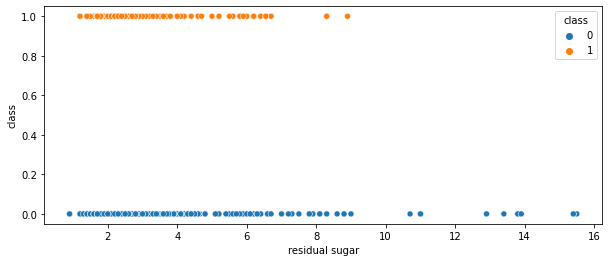

In [27]:
list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar']
list1 = ['chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density']
list2 = ['pH', 'sulphates', 'alcohol']
for i in list:
    plt.figure(figsize=(10,4))
    sns.scatterplot(data = df, x=i, y='class', hue='class')

'fixed acidity' - good wines have a range of 2 to 13.5 for fixed acidity.<br>
'volatile acidity' -good wines have a range of 0.1 to 0.95 for volatile acidity.<br>
'citric acid' - good wines have a similar range for both the wine categories for citric acid.<br>
'residual sugar' - good wines have a range of 1 to 7  for residual sugar.<br>

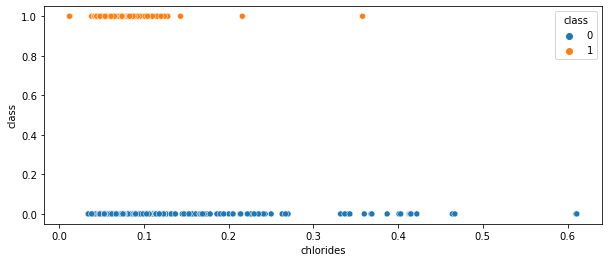

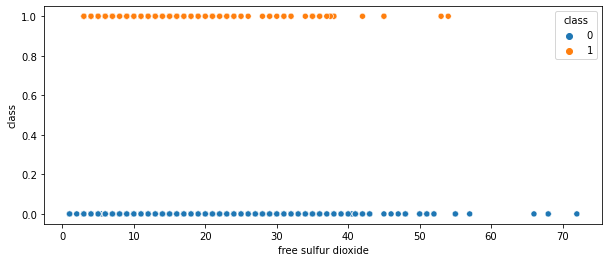

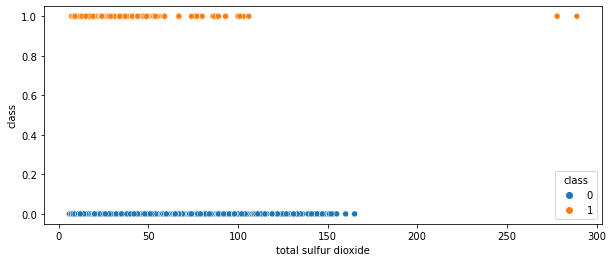

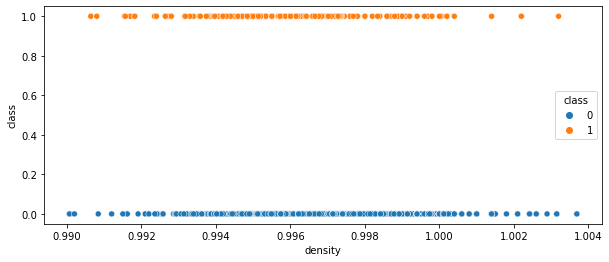

In [28]:
for i in list1:
    plt.figure(figsize=(10,4))
    sns.scatterplot(data = df, x=i, y='class', hue='class')

'chlorides' - good wines have a range of 0.05 to 0.15 for chlorides.<br>
'free sulfur dioxide' - good wines have a range of 1 to 39 for free sulfur dioxide.<br>
'total sulfur dioxide' - good wines have a range of 5 to 110 for total sulfur dioxide.<br>
'density' - good wines have a range of 0.991 to 1.001 for density.<br>

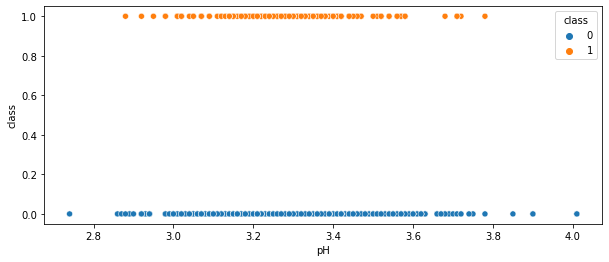

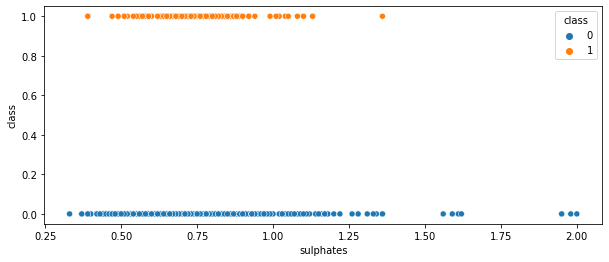

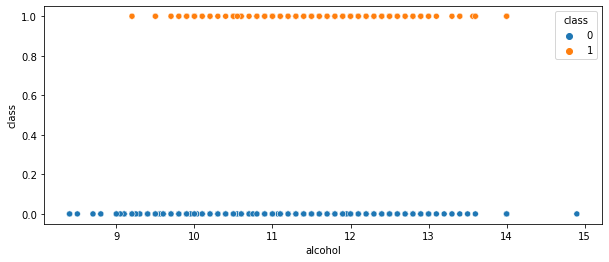

In [29]:
for i in list2:
    plt.figure(figsize=(10,4))
    sns.scatterplot(data = df, x=i, y='class', hue='class')

'pH' - good wines have a range of 2.83 to 3.58 for pH.<br>
'sulphates' - good wines have a range of 0.47 to 1.18 for sulphates.<br>
'alcohol' - good wines have a range of 8 to 13.7 for alcohol.<br>

In [30]:
corr_relation = df.corr()
corr_relation['class'].sort_values(ascending=False)

class                   1.000000
quality                 0.710196
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: class, dtype: float64

# Outliers and Skewness

In [31]:
df.drop('quality',axis=1).skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
class                   2.129363
dtype: float64

Apart from 'Citric acid' and 'density' all the other features are skewed.

In [32]:
df = df.drop('quality',axis=1)

In [33]:
#function for detecting outliers when feature has skewness (by IQR)

def outlier_IQR(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*1.5)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*1.5)
    return(lower_bridge,upper_bridge)

In [34]:
#function for detecting outliers when feature has huge skewness (by IQR)

def outlier_IQR3(data_frame,feature_name):
    IQR = data_frame[feature_name].quantile(0.75) - data_frame[feature_name].quantile(0.25)
    lower_bridge = data_frame[feature_name].quantile(0.25) - (IQR*3)
    upper_bridge = data_frame[feature_name].quantile(0.75) + (IQR*3)
    return(lower_bridge,upper_bridge)

In [35]:
#function for detecting outliers when feature has Normally Distributed (by mean-+3dtf)

def outlier_normally(data_frame,feature_name):
    lower_boundary = data_frame[feature_name].mean() - 3*data_frame[feature_name].std()
    upper_boundary = data_frame[feature_name].mean() + 3*data_frame[feature_name].std()
    return(lower_boundary,upper_boundary)

In [36]:
#function for checking data is Normally Distributed by QQ-plot.

from scipy import stats
import pylab

def original_dist(data_frame,feature_name):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    stats.probplot(data_frame[feature_name], dist="norm", plot=pylab)
    plt.subplot(1,2,2)
    data_frame[feature_name].hist()
    plt.title("Original_dist")
    plt.show()

In [37]:
#function for LOG transformation Technique

def log_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = np.log(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("log_transform")
        plt.show()

In [38]:
#function for Reciprocal transformation Technique

def reciprocal_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = 1/data_frame_copy[feature_name] 
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("reciprocal_transform")
        plt.show()

In [39]:
#function for Square root transformation Technique

def squareroot_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("squareroot_transform")
        plt.show()

In [40]:
#function for Exponential transformation Technique

def exponential_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = data_frame_copy[feature_name]**(1/1.2)
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("exponential_transform")
        plt.show()

In [41]:
#function for Box cox transformation Technique

def boxcox_transform(data_frame,feature_name):
    data_frame_copy = data_frame.copy()
    if 0 in data_frame_copy[feature_name].unique():
        pass
    else:
        data_frame_copy[feature_name] = stats.boxcox(data_frame_copy[feature_name])
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        stats.probplot(data_frame_copy[feature_name], dist="norm",plot=pylab)
        plt.subplot(1,2,2)
        data_frame_copy[feature_name].hist()
        plt.title("boxcox_transform")
        plt.show()

<AxesSubplot:>

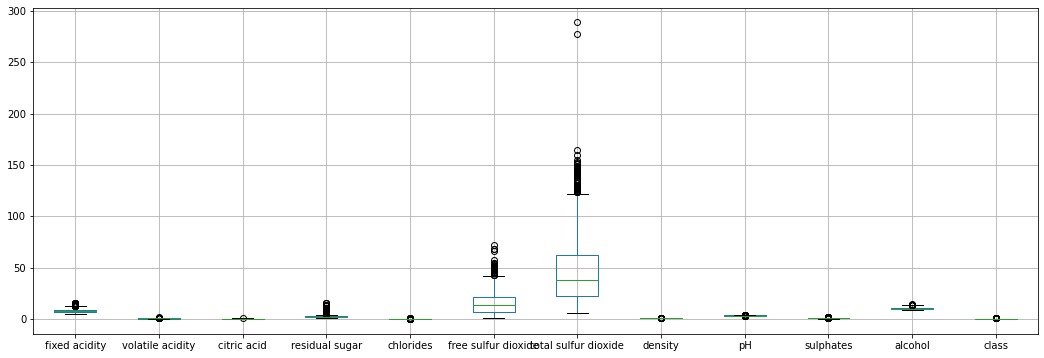

In [42]:
plt.figure(figsize=(18,6))
df.boxplot()

In [43]:
data = df.copy()

## Fixed Acidity Column.

In [44]:
data['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

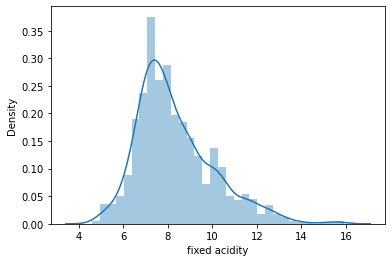

In [45]:
sns.distplot(data['fixed acidity'])

<AxesSubplot:xlabel='fixed acidity'>

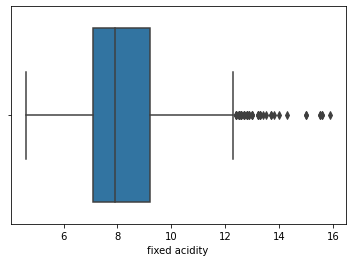

In [46]:
sns.boxplot(data['fixed acidity'])

The feature is slightly right skewed.

In [47]:
outlier_IQR(data, 'fixed acidity')

(3.95, 12.349999999999998)

In [48]:
data[data['fixed acidity']>12.349999999999998].shape

(49, 12)

In [49]:
data = data[data['fixed acidity']<=12.349999999999998]

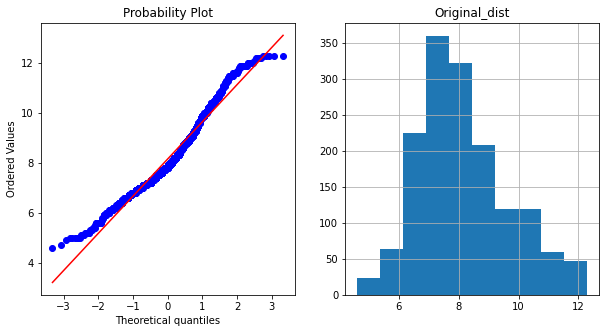

In [50]:
original_dist(data,'fixed acidity')

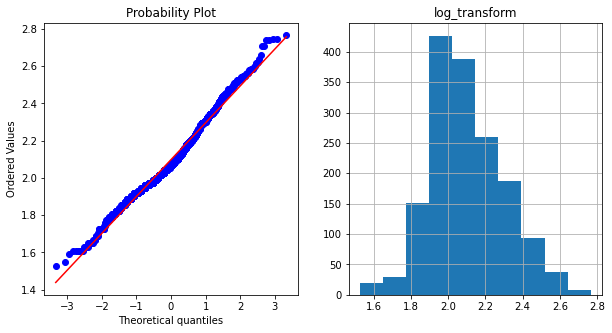

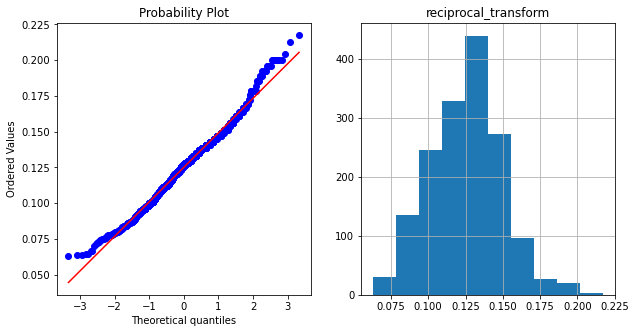

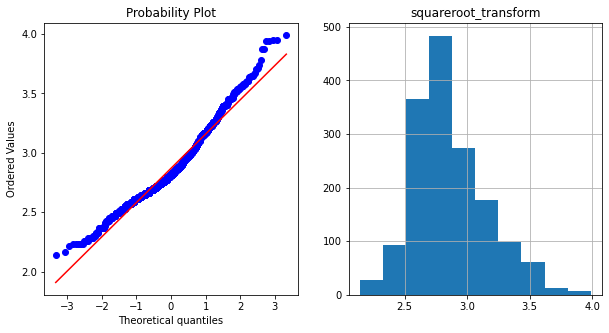

In [51]:
log_transform(df,'fixed acidity')

reciprocal_transform(df,'fixed acidity')

squareroot_transform(df,'fixed acidity')

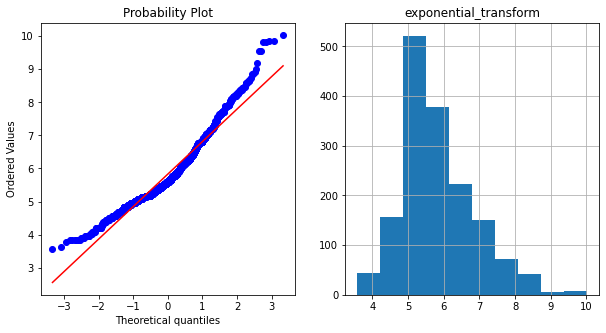

In [52]:
exponential_transform(df,'fixed acidity')

In [53]:
data['fixed acidity'] = np.log(data['fixed acidity'])
data['fixed acidity'].skew()

0.1444865946720234

Applied logarthemic transformation on this columns and removed outliers.

## Volatile Acidity Column

In [54]:
data['volatile acidity'].describe()

count    1550.000000
mean        0.530294
std         0.179731
min         0.120000
25%         0.395000
50%         0.520000
75%         0.640000
max         1.580000
Name: volatile acidity, dtype: float64

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

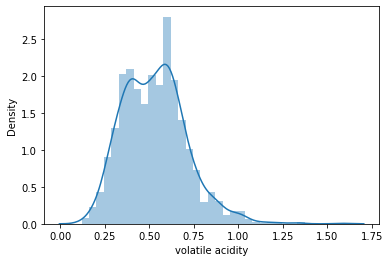

In [55]:
sns.distplot(data['volatile acidity'])

<AxesSubplot:xlabel='volatile acidity'>

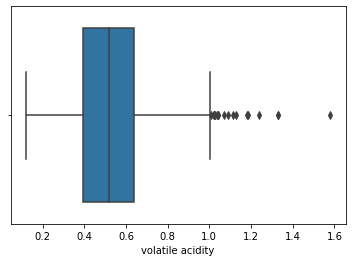

In [56]:
sns.boxplot(data['volatile acidity'])

In [57]:
outlier_IQR(data, 'volatile acidity')

(0.027500000000000024, 1.0075)

In [58]:
data[data['volatile acidity']>1.0075].shape

(20, 12)

In [59]:
data = data[data['volatile acidity']<=1.0075]

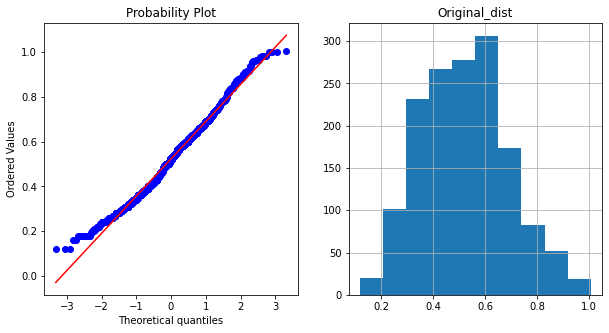

In [60]:
original_dist(data,'volatile acidity' )

In [61]:
data['volatile acidity'].skew()

0.26620582977221

Remove outliers and the data is already under appreciable skewness.

## Citric Acid Column

In [62]:
data['citric acid'].describe()

count    1530.000000
mean        0.262641
std         0.188678
min         0.000000
25%         0.090000
50%         0.250000
75%         0.410000
max         1.000000
Name: citric acid, dtype: float64

<AxesSubplot:xlabel='citric acid', ylabel='Density'>

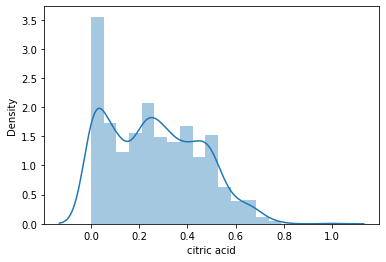

In [63]:
sns.distplot(data['citric acid'])

<AxesSubplot:xlabel='citric acid'>

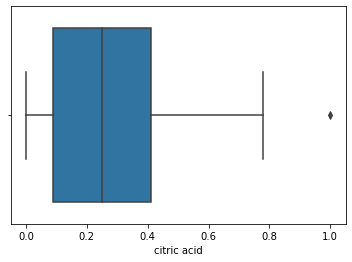

In [64]:
sns.boxplot(data['citric acid'])

skewness let us IQR *1.5(std) method

In [65]:
outlier_IQR(data, 'citric acid')

(-0.3899999999999999, 0.8899999999999999)

In [66]:
data[data['citric acid']>0.8899999999999999].shape

(1, 12)

In [67]:
data = data[data['citric acid']<=0.8899999999999999]

In [68]:
data['citric acid'].skew()

0.29599354876490064

Skewness is already in range and removed outlier.

## Residual Sugar Column

In [69]:
data['residual sugar'].describe()

count    1529.000000
mean        2.518116
std         1.414668
min         0.900000
25%         1.900000
50%         2.200000
75%         2.600000
max        15.500000
Name: residual sugar, dtype: float64

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

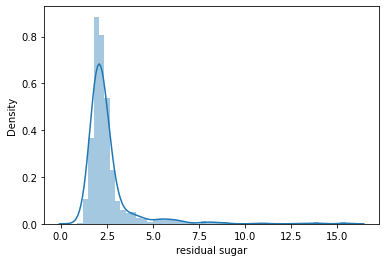

In [70]:
sns.distplot(data['residual sugar'])

<AxesSubplot:xlabel='residual sugar'>

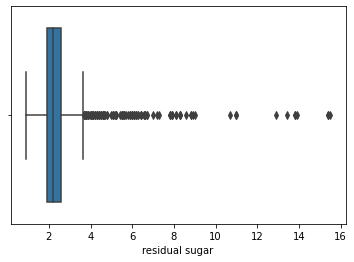

In [71]:
sns.boxplot(data['residual sugar'])

High skewness

In [72]:
outlier_IQR3(data, 'residual sugar')

(-0.20000000000000062, 4.700000000000001)

In [73]:
data[data['residual sugar']>4.700000000000001].shape

(82, 12)

In [74]:
data = data[data['residual sugar']<=4.700000000000001]

In [75]:
data['residual sugar'].skew()

1.458927183556544

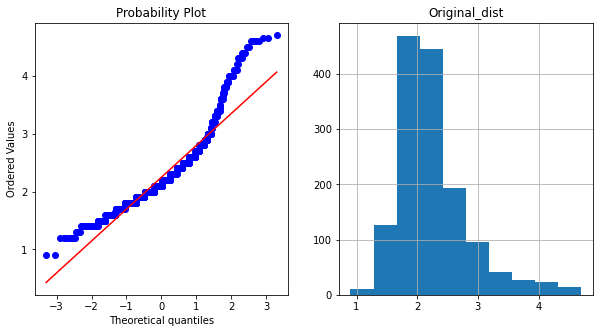

In [76]:
original_dist(data, 'residual sugar')

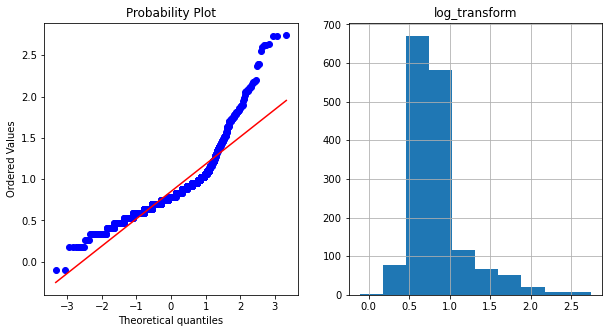

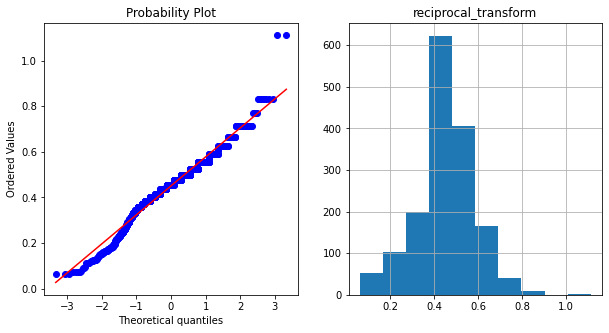

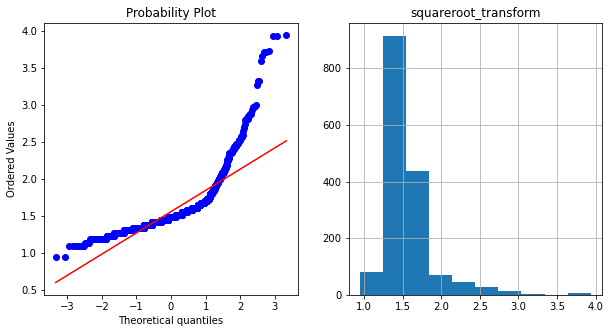

In [77]:
log_transform(df,'residual sugar')

reciprocal_transform(df,'residual sugar')

squareroot_transform(df,'residual sugar')

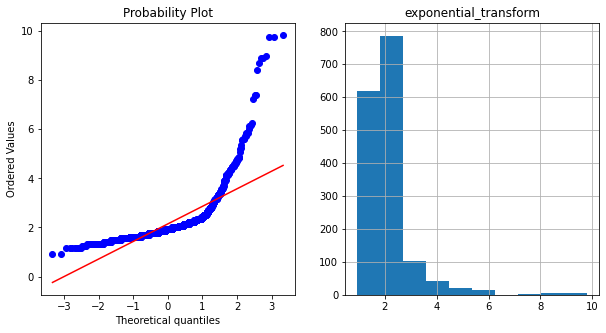

In [78]:
exponential_transform(df,'residual sugar')

In [79]:
data['residual sugar'] = 1/data['residual sugar']

In [80]:
data['residual sugar'].skew()

0.5027892207603251

Treated outlier and skewness.

## pH Column

In [81]:
data['pH'].describe()

count    1447.000000
mean        3.318113
std         0.149278
min         2.870000
25%         3.220000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64

<AxesSubplot:xlabel='pH', ylabel='Density'>

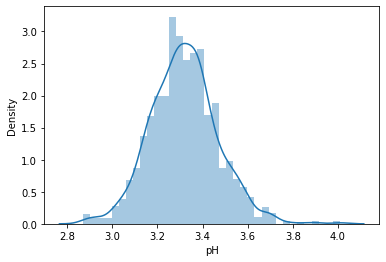

In [82]:
sns.distplot(data['pH'])

<AxesSubplot:xlabel='pH'>

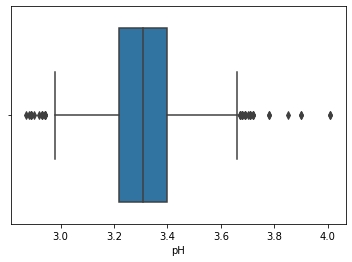

In [83]:
sns.boxplot(data['pH'])

Normally distributed column

In [84]:
outlier_normally(data, 'pH')

(2.870279343250264, 3.765947332630873)

In [85]:
data[data['pH']>3.765947332630873].shape

(7, 12)

In [86]:
data = data[data['pH']<=3.765947332630873]

In [87]:
data['pH'].skew()

0.04371761996243739

Treated outliers and skewness got corrected by itself.

## Free Sulfur Dioxide Column

In [88]:
data['free sulfur dioxide'].describe()

count    1440.000000
mean       15.628472
std         9.894535
min         1.000000
25%         7.000000
50%        14.000000
75%        21.000000
max        57.000000
Name: free sulfur dioxide, dtype: float64

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

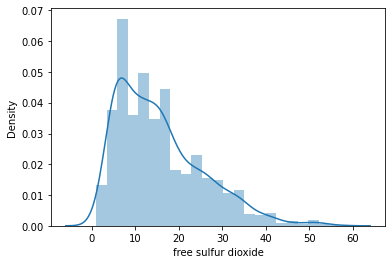

In [89]:
sns.distplot(data['free sulfur dioxide'])

<AxesSubplot:xlabel='free sulfur dioxide'>

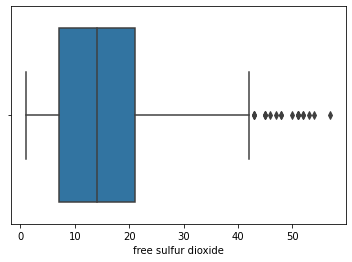

In [90]:
sns.boxplot(data['free sulfur dioxide'])

In [91]:
outlier_IQR3(data, 'free sulfur dioxide')

(-35.0, 63.0)

In [92]:
data[data['free sulfur dioxide']>63.0].shape

(0, 12)

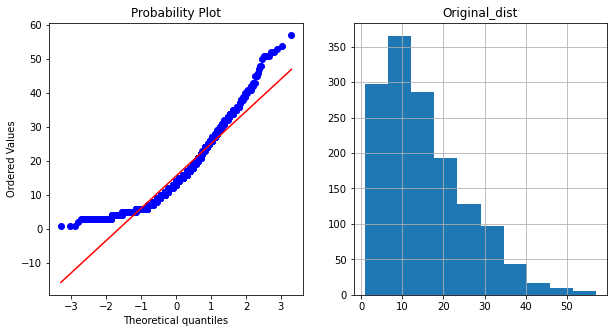

In [93]:
original_dist(data, 'free sulfur dioxide')

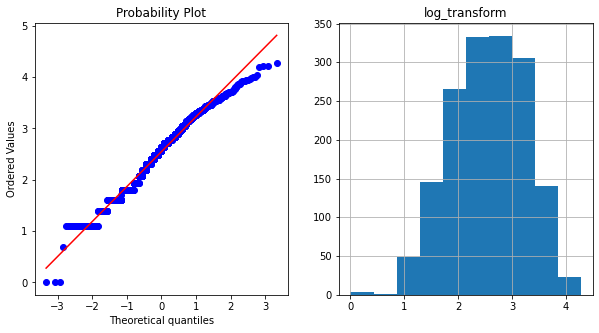

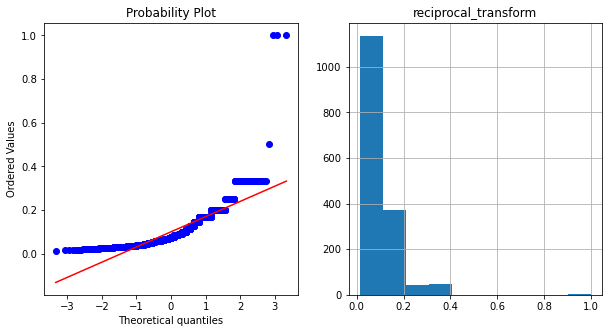

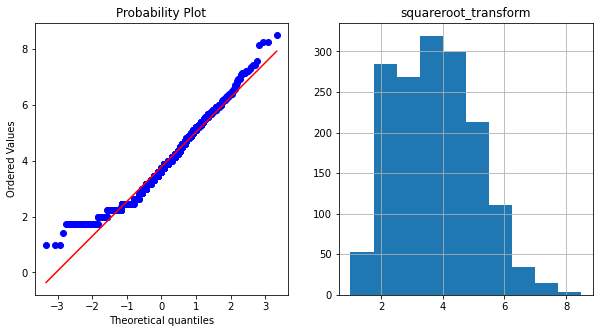

In [94]:
log_transform(df,'free sulfur dioxide')

reciprocal_transform(df,'free sulfur dioxide')

squareroot_transform(df,'free sulfur dioxide')

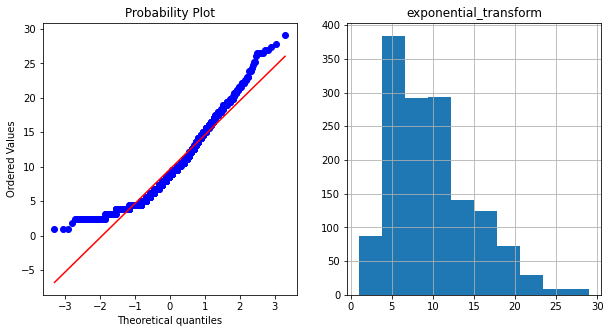

In [95]:
exponential_transform(data, "free sulfur dioxide")

In [96]:
data['free sulfur dioxide'] = np.log(data['free sulfur dioxide'])
data['free sulfur dioxide'].skew()

-0.29065102417642735

Treated skewness, outliers under accepted values

## Total Sulfur Dioxide column

In [97]:
data['total sulfur dioxide'].describe()

count    1440.000000
mean       45.253472
std        30.913405
min         6.000000
25%        22.000000
50%        37.000000
75%        60.000000
max       165.000000
Name: total sulfur dioxide, dtype: float64

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

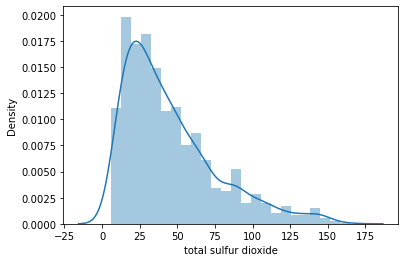

In [98]:
sns.distplot(data['total sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide'>

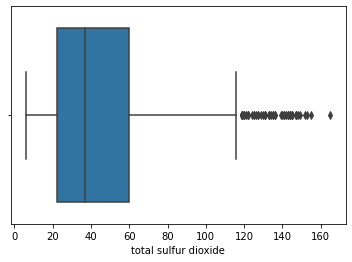

In [99]:
sns.boxplot(data['total sulfur dioxide'])

In [100]:
outlier_IQR3(data, 'total sulfur dioxide')

(-92.0, 174.0)

In [101]:
data[data['total sulfur dioxide']>174.0].shape

(0, 12)

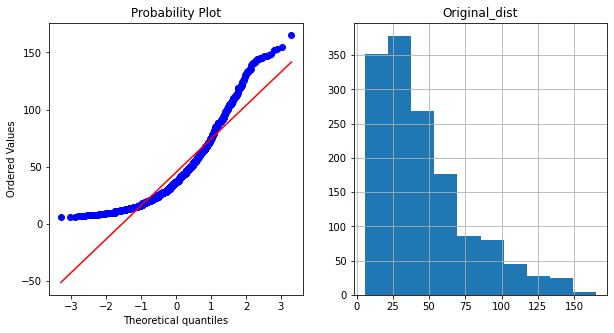

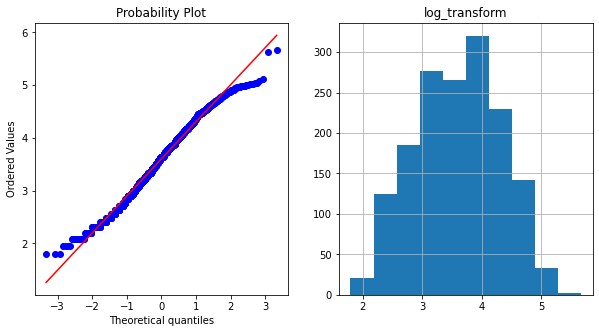

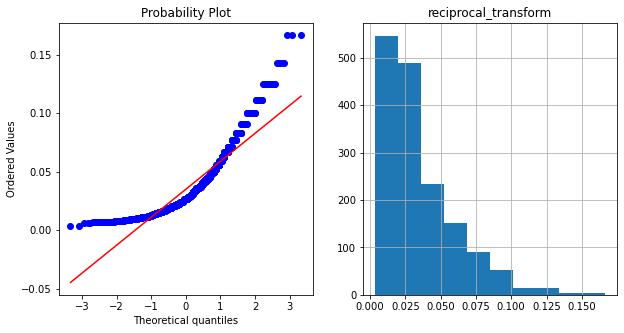

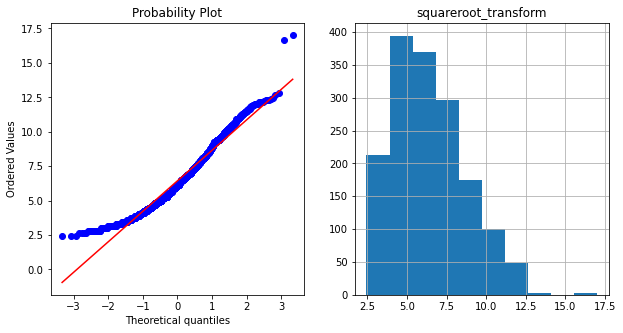

In [102]:
original_dist(data, 'total sulfur dioxide')

log_transform(df,'total sulfur dioxide')

reciprocal_transform(df,'total sulfur dioxide')

squareroot_transform(df,'total sulfur dioxide')

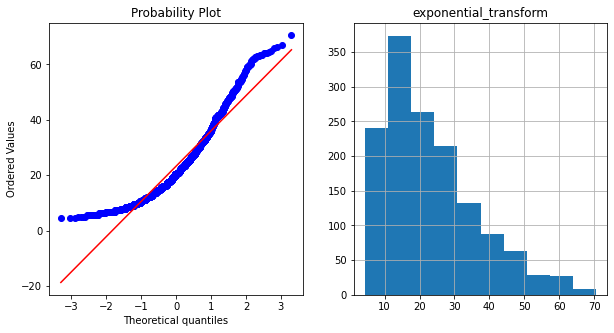

In [103]:
exponential_transform(data, 'total sulfur dioxide')

In [104]:
data['total sulfur dioxide'] = np.log(data['total sulfur dioxide'])

In [105]:
data['total sulfur dioxide'].skew()

-0.10455519901076679

Treated skewness, outliers under accepted values

## Density column

In [106]:
data['density'].describe()

count    1440.000000
mean        0.996566
std         0.001707
min         0.990070
25%         0.995537
50%         0.996600
75%         0.997600
max         1.001000
Name: density, dtype: float64

<AxesSubplot:xlabel='density', ylabel='Density'>

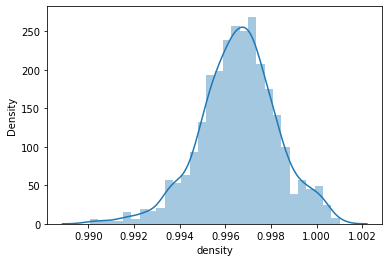

In [107]:
sns.distplot(data['density'])

<AxesSubplot:xlabel='density'>

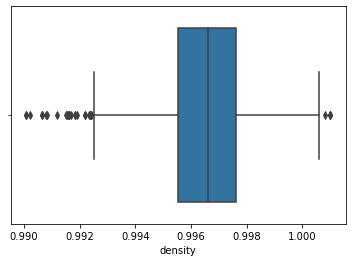

In [108]:
sns.boxplot(data['density'])

In [109]:
outlier_normally(data, 'density')

(0.9914447094912635, 1.0016875127309577)

In [110]:
data[data['density']>1.0016875127309577].shape

(0, 12)

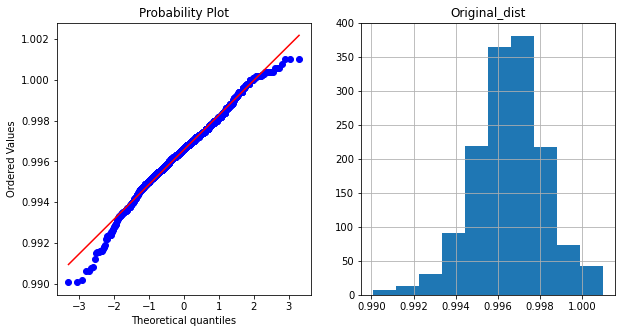

In [111]:
original_dist(data, 'density')

In [112]:
data['density'].skew()

-0.3033516271277441

All good with this column

## Sulphates column

In [113]:
data['sulphates'].describe()

count    1440.000000
mean        0.656493
std         0.168263
min         0.330000
25%         0.550000
50%         0.620000
75%         0.720000
max         1.980000
Name: sulphates, dtype: float64

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

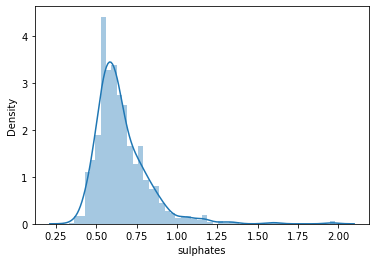

In [114]:
sns.distplot(data['sulphates'])

<AxesSubplot:xlabel='sulphates'>

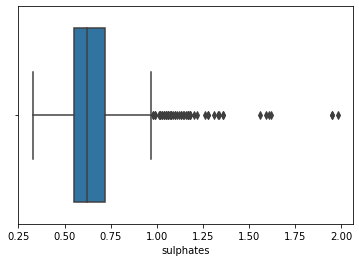

In [115]:
sns.boxplot(data['sulphates'])

In [116]:
outlier_normally(data, 'sulphates')

(0.15170533888790483, 1.1612807722232081)

In [117]:
data[data['sulphates']>1.1612807722232081].shape

(25, 12)

In [118]:
data = data[data['sulphates']<=1.1612807722232081]

In [119]:
data['sulphates'].skew()

0.9614638117296688

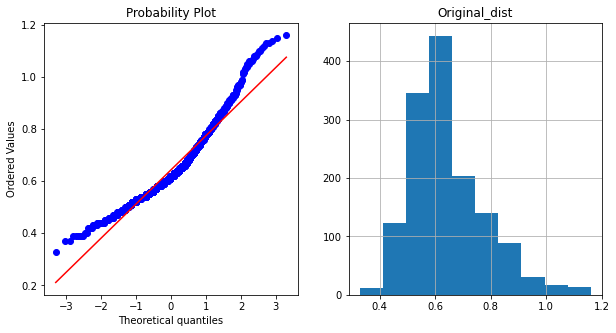

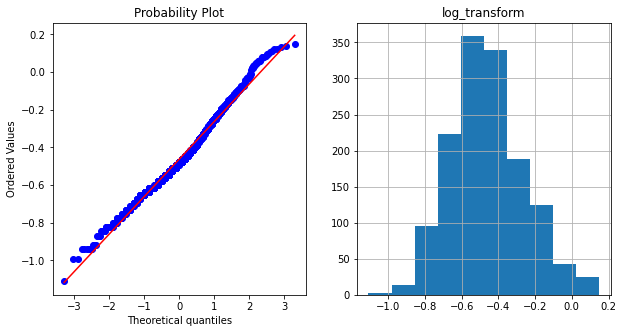

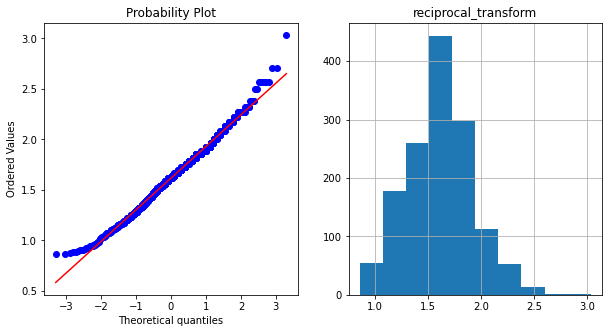

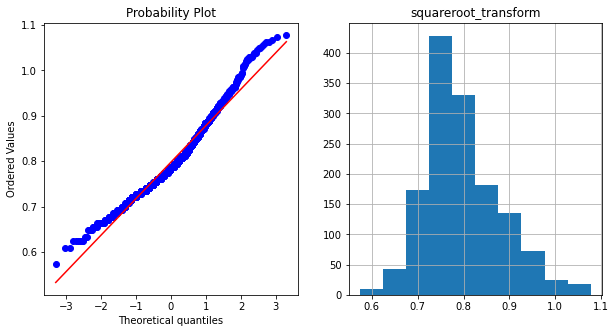

In [120]:
original_dist(data, 'sulphates')

log_transform(data,'sulphates')

reciprocal_transform(data,'sulphates')

squareroot_transform(data,'sulphates')

In [121]:
data['sulphates'] = np.log(data['sulphates'])
data['sulphates'].skew()

0.37783073849979515

Treated outliers and skewness

## Alcohol Column

In [122]:
data['alcohol'].describe()

count    1415.000000
mean       10.412638
std         1.054491
min         8.400000
25%         9.500000
50%        10.100000
75%        11.100000
max        14.000000
Name: alcohol, dtype: float64

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

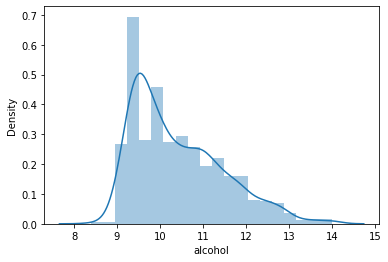

In [123]:
sns.distplot(data['alcohol'])

<AxesSubplot:xlabel='alcohol'>

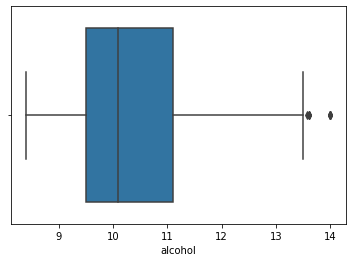

In [124]:
sns.boxplot(data['alcohol'])

In [125]:
outlier_IQR3(data, 'alcohol')

(4.700000000000001, 15.899999999999999)

In [126]:
data[data['alcohol']>15.899999999999999].shape

(0, 12)

In [127]:
data['alcohol'].skew()

0.8712075346132563

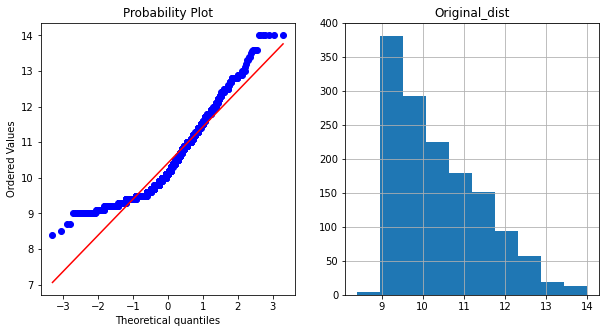

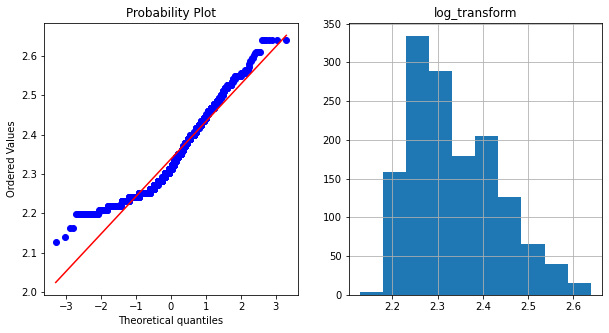

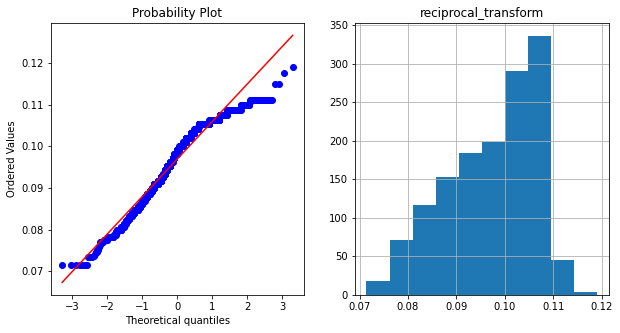

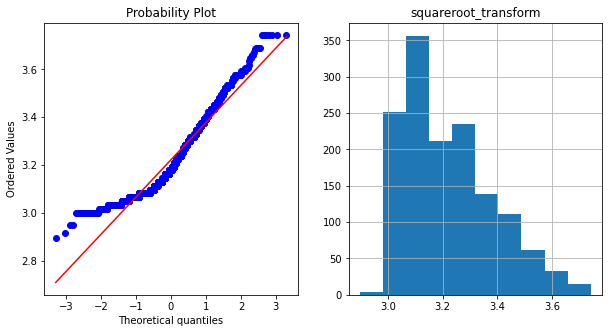

In [128]:
original_dist(data, 'alcohol')

log_transform(data,'alcohol')

reciprocal_transform(data,'alcohol')

squareroot_transform(data,'alcohol')

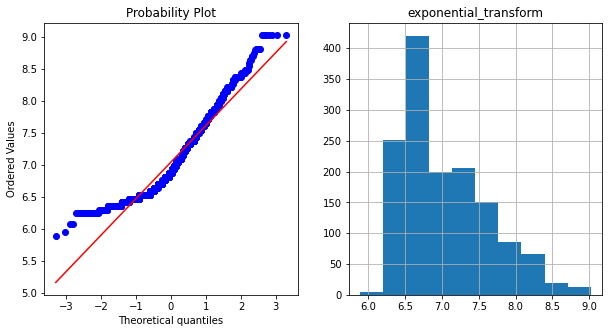

In [129]:
exponential_transform(data, 'alcohol')

In [130]:
np.log(data['alcohol']).skew()

0.6816349052372032

In [131]:
data['alcohol'] = 1/data['alcohol']
data['alcohol'].skew()

-0.5087646069837322

Treated skewnes and outliers are in accepted range.

In [132]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,class
0,2.001480,0.70,0.00,0.526316,0.076,2.397895,3.526361,0.9978,3.51,-0.579818,0.106383,0
1,2.054124,0.88,0.00,0.384615,0.098,3.218876,4.204693,0.9968,3.20,-0.385662,0.102041,0
2,2.054124,0.76,0.04,0.434783,0.092,2.708050,3.988984,0.9970,3.26,-0.430783,0.102041,0
3,2.415914,0.28,0.56,0.526316,0.075,2.833213,4.094345,0.9980,3.16,-0.544727,0.102041,0
4,2.001480,0.70,0.00,0.526316,0.076,2.397895,3.526361,0.9978,3.51,-0.579818,0.106383,0


In [133]:
data.shape

(1415, 12)

In [134]:
x = data.drop('class', axis=1)
y = data['class']

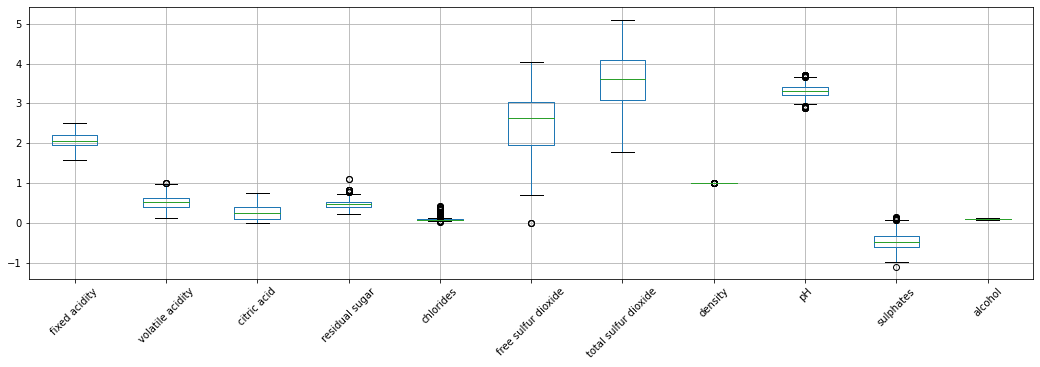

In [135]:
x.boxplot(figsize=(18,6))
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=45)
plt.show()

In [136]:
y.value_counts()

0    1228
1     187
Name: class, dtype: int64

This is clearly a data imbalance problem. We will treat this issue first.

# Method1:  UnderSampling.

In [137]:
not_good = data[data['class']==0]
good = data[data['class']==1]

In [138]:
good.shape

(187, 12)

In [139]:
not_good.shape

(1228, 12)

We would want 187 samples from not_good

In [140]:
Under_sample = not_good.sample(187)

In [141]:
test_under = pd.concat([Under_sample, good], axis=0)

In [142]:
test_under.shape

(374, 12)

In [143]:
test_under['class'].value_counts()

1    187
0    187
Name: class, dtype: int64

We have created a new DataFrame with same amount of good and not_good wines.

In [144]:
x1 = test_under.drop('class', axis=1)
y1 = test_under['class']

## Finding the best random state for the model


In [145]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

We have imported all the algorithms and will find the best random state for our model and move towards testing different algorithms.

In [147]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.8533333333333334 on random state 5


We got a good accuracy with undersampling of data. Lets use all the algorithms.<br>The random state would be 5.

In [148]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.20,random_state=5)

Now we will try out every model and look at the Accuracy Score.

In [149]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.76
[[26 13]
 [ 5 31]]
              precision    recall  f1-score   support

           0       0.84      0.67      0.74        39
           1       0.70      0.86      0.78        36

    accuracy                           0.76        75
   macro avg       0.77      0.76      0.76        75
weighted avg       0.77      0.76      0.76        75



In [150]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8
[[32  7]
 [ 8 28]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        39
           1       0.80      0.78      0.79        36

    accuracy                           0.80        75
   macro avg       0.80      0.80      0.80        75
weighted avg       0.80      0.80      0.80        75



In [151]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8266666666666667
[[29 10]
 [ 3 33]]
              precision    recall  f1-score   support

           0       0.91      0.74      0.82        39
           1       0.77      0.92      0.84        36

    accuracy                           0.83        75
   macro avg       0.84      0.83      0.83        75
weighted avg       0.84      0.83      0.83        75



In [152]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8133333333333334
[[31  8]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.79      0.83      0.81        36

    accuracy                           0.81        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.81      0.81      0.81        75



In [153]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.72
[[24 15]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.80      0.62      0.70        39
           1       0.67      0.83      0.74        36

    accuracy                           0.72        75
   macro avg       0.73      0.72      0.72        75
weighted avg       0.74      0.72      0.72        75



In [154]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.6933333333333334
[[22 17]
 [ 6 30]]
              precision    recall  f1-score   support

           0       0.79      0.56      0.66        39
           1       0.64      0.83      0.72        36

    accuracy                           0.69        75
   macro avg       0.71      0.70      0.69        75
weighted avg       0.71      0.69      0.69        75



RandomForest gave a good accuracy with 82.7%. Let's cross validate all the algorithm.

# Crossvalidation

In [155]:
from sklearn.model_selection import cross_val_score
rfc = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc.mean())

Cross validation score of Random Forest Classifier: 0.8770318021201413


In [156]:
dtc = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc.mean())

Cross validation score of Decision Tree Classifier: 0.8332155477031801


In [157]:
knc = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc.mean())

Cross validation score of Kneigbors Classifier: 0.8445229681978799


In [158]:
lrc = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc.mean())

Cross validation score of Logistic Regression Classifier: 0.8636042402826855


Decision tree has low difference in model accuracy and cross validation.

## Hyperparameter Tuning

In [159]:
from sklearn.model_selection import RandomizedSearchCV

In [160]:
#Creating parameter list to pass in RandomizedSearchCV

parameters = {'max_depth': np.arange(2,10),
              'criterion':['gini','entropy']}

In [161]:
DCV = RandomizedSearchCV(DecisionTreeClassifier(), parameters, cv=5)
DCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [162]:
#Printing the best parameters.
DCV.best_params_

{'max_depth': 4, 'criterion': 'gini'}

## Final Model

In [163]:
model1 = DecisionTreeClassifier(criterion= 'gini', max_depth= 4, random_state = 5)
model1.fit(x_train,y_train)
pred = model1.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

77.33333333333333
[[31  8]
 [ 9 27]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.78        39
           1       0.77      0.75      0.76        36

    accuracy                           0.77        75
   macro avg       0.77      0.77      0.77        75
weighted avg       0.77      0.77      0.77        75



# Method 2: OverSampling

In [164]:
good.shape

(187, 12)

In [165]:
not_good.shape

(1228, 12)

In [166]:
over_sample = good.sample(1228, replace=True)

In [167]:
over_sample.shape

(1228, 12)

In [168]:
test_over = pd.concat([not_good, over_sample], axis=0)

In [169]:
test_over.shape

(2456, 12)

In [170]:
test_over['class'].value_counts()

1    1228
0    1228
Name: class, dtype: int64

In [171]:
x2 = test_over.drop('class', axis=1)
y2 = test_over['class']

In [172]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.983739837398374 on random state 84


Awesome! Accuracy seems improved with OverSampling. Let's see how all the algorithm performs.

## **Model Creation**


In [173]:
x_train,x_test,y_train,y_test = train_test_split(x2,y2,test_size=0.20,random_state=84)

## Creating train_test_split


In [174]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.7560975609756098
[[170  57]
 [ 63 202]]
              precision    recall  f1-score   support

           0       0.73      0.75      0.74       227
           1       0.78      0.76      0.77       265

    accuracy                           0.76       492
   macro avg       0.75      0.76      0.76       492
weighted avg       0.76      0.76      0.76       492



In [175]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9776422764227642
[[216  11]
 [  0 265]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       227
           1       0.96      1.00      0.98       265

    accuracy                           0.98       492
   macro avg       0.98      0.98      0.98       492
weighted avg       0.98      0.98      0.98       492



In [176]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.983739837398374
[[219   8]
 [  0 265]]
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       227
           1       0.97      1.00      0.99       265

    accuracy                           0.98       492
   macro avg       0.99      0.98      0.98       492
weighted avg       0.98      0.98      0.98       492



In [177]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8556910569105691
[[184  43]
 [ 28 237]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       227
           1       0.85      0.89      0.87       265

    accuracy                           0.86       492
   macro avg       0.86      0.85      0.85       492
weighted avg       0.86      0.86      0.86       492



In [178]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9207317073170732
[[192  35]
 [  4 261]]
              precision    recall  f1-score   support

           0       0.98      0.85      0.91       227
           1       0.88      0.98      0.93       265

    accuracy                           0.92       492
   macro avg       0.93      0.92      0.92       492
weighted avg       0.93      0.92      0.92       492



In [179]:
sv = SVC()
sv.fit(x_train,y_train)
pred = sv.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.75
[[173  54]
 [ 69 196]]
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       227
           1       0.78      0.74      0.76       265

    accuracy                           0.75       492
   macro avg       0.75      0.75      0.75       492
weighted avg       0.75      0.75      0.75       492



DecisionTree and RandomForest performed really well. Lets move forward with cross validation.

## Crossvalidation

In [180]:
rfc1 = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc1.mean())

Cross validation score of Random Forest Classifier: 0.8734982332155476


In [181]:
dtc1 = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc1.mean())

Cross validation score of Decision Tree Classifier: 0.8296819787985866


In [182]:
knc1 = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc1.mean())

Cross validation score of Kneigbors Classifier: 0.8445229681978799


In [183]:
lrc1 = cross_val_score(lr, x, y, cv=5)

print("Cross validation score of Logistic Regression Classifier:", lrc1.mean())

Cross validation score of Logistic Regression Classifier: 0.8636042402826855


Here's the same, RandomForest has best performance.

## Hyperparameter Tuning


In [184]:
#Creating parameter list to pass in GridsearchCV

parameters1 = {'max_depth': np.arange(2,10),
              'criterion':['gini','entropy']}

In [185]:
RCV = RandomizedSearchCV(RandomForestClassifier(), parameters1, cv=5)
RCV.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [186]:
#Printing the best parameters.
RCV.best_params_

{'max_depth': 9, 'criterion': 'gini'}

## Final Model

In [187]:
model2 = RandomForestClassifier(criterion= 'gini', max_depth= 9, random_state = 84)
model2.fit(x_train,y_train)
pred = model2.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

97.15447154471545
[[213  14]
 [  0 265]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       227
           1       0.95      1.00      0.97       265

    accuracy                           0.97       492
   macro avg       0.97      0.97      0.97       492
weighted avg       0.97      0.97      0.97       492



This method with RandomForest gave us the best result so far with 97.2% accuracy.

# Method 3: SMOTE


In [188]:
from imblearn.over_sampling import SMOTE

In [189]:
y.value_counts()

0    1228
1     187
Name: class, dtype: int64

In [190]:
smote = SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_sample(x,y)

y_sm.value_counts()

1    1228
0    1228
Name: class, dtype: int64

In [191]:
maxAccu = 0
maxRS = 0

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=i)
    lr = DecisionTreeClassifier()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    accu = accuracy_score(y_test,pred)
    
    if accu > maxAccu:
        maxAccu = accu
        maxRS = i
print("Best accuracy is",maxAccu,"on random state",maxRS)

Best accuracy is 0.9329268292682927 on random state 82


## **Model Creation**


In [192]:
x_train,x_test,y_train,y_test = train_test_split(x_sm,y_sm,test_size=0.20,random_state=82)

In [193]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8028455284552846
[[194  45]
 [ 52 201]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       239
           1       0.82      0.79      0.81       253

    accuracy                           0.80       492
   macro avg       0.80      0.80      0.80       492
weighted avg       0.80      0.80      0.80       492



In [194]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.926829268292683
[[218  21]
 [ 15 238]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       239
           1       0.92      0.94      0.93       253

    accuracy                           0.93       492
   macro avg       0.93      0.93      0.93       492
weighted avg       0.93      0.93      0.93       492



In [195]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.9552845528455285
[[225  14]
 [  8 245]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       239
           1       0.95      0.97      0.96       253

    accuracy                           0.96       492
   macro avg       0.96      0.95      0.96       492
weighted avg       0.96      0.96      0.96       492



In [196]:
ad = AdaBoostClassifier()
ad.fit(x_train,y_train)
pred = ad.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8861788617886179
[[213  26]
 [ 30 223]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       239
           1       0.90      0.88      0.89       253

    accuracy                           0.89       492
   macro avg       0.89      0.89      0.89       492
weighted avg       0.89      0.89      0.89       492



In [197]:
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred = kn.predict(x_test)
print("Accuracy score:",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy score: 0.8963414634146342
[[192  47]
 [  4 249]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88       239
           1       0.84      0.98      0.91       253

    accuracy                           0.90       492
   macro avg       0.91      0.89      0.89       492
weighted avg       0.91      0.90      0.90       492



RandomForest did good in this method.

## Crossvalidation

In [198]:
rfc2 = cross_val_score(rf, x, y, cv=5)

print("Cross validation score of Random Forest Classifier:", rfc2.mean())

Cross validation score of Random Forest Classifier: 0.8784452296819788


In [199]:
dtc2 = cross_val_score(dt, x, y, cv=5)

print("Cross validation score of Decision Tree Classifier:", dtc2.mean())

Cross validation score of Decision Tree Classifier: 0.8176678445229681


In [200]:
knc1 = cross_val_score(kn, x, y, cv=5)

print("Cross validation score of Kneigbors Classifier:", knc1.mean())

Cross validation score of Kneigbors Classifier: 0.8445229681978799


KNearest Algorithm have lowest difference between cross validation and model

## Hyperparameter Tuning


In [201]:
#Creating parameter list to pass in RandomisedSearchCv

parameters = {'n_neighbors':np.arange(5,10),
              'algorithm': ['ball_tree','kd_tree','brute','auto'],
              'p':[1,2]}

In [202]:
RCV2 = RandomizedSearchCV(KNeighborsClassifier(), parameters, cv=5)
RCV2.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute', 'auto'],
                                        'n_neighbors': array([5, 6, 7, 8, 9]),
                                        'p': [1, 2]})

In [203]:
#Printing the best parameters.
RCV2.best_params_

{'p': 1, 'n_neighbors': 5, 'algorithm': 'kd_tree'}

## Model

In [204]:
model3 = KNeighborsClassifier(p= 1, n_neighbors= 5, algorithm= 'kd_tree')
model3.fit(x_train,y_train)
pred = model3.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

90.65040650406505
[[196  43]
 [  3 250]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       239
           1       0.85      0.99      0.92       253

    accuracy                           0.91       492
   macro avg       0.92      0.90      0.91       492
weighted avg       0.92      0.91      0.91       492



# Conclusion

**Oversampling method stands out with RandomForest Algorithm. This model gives 97.2% Accuracy.**

# Saving the Model for submission

In [205]:
import joblib
joblib.dump(model2,"winequality_red_submission.pkl")

['winequality_red_submission.pkl']